# TP 4 : remontée

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1) Algorithme de remontée

### Exercice 1

À la main on trouve $x=\begin{pmatrix}-1 \\-1 \\ 1\end{pmatrix}.$ 
Et le déterminant est 8.

In [2]:
A=np.array([[1,1,3],[0,2,4],[0,0,4]])
b=np.array([1,2,4])
x=np.zeros(3)
x[2]=b[2]/A[2,2]
x[1]=(1/(A[1,1]))*(b[1]-x[2]*A[1,2])
x[0]=(1/(A[0,0]))*(b[0]-x[2]*A[0,2]-x[1]*A[0,1])
print(x)

[-1. -1.  1.]


### Exercice 2

In [3]:
## On crée la fonction qui à une matrice A donnée et un vecteur b donné, renvoie la solution de Ax=b
def Remontee(A,b):
    dim=np.shape(b)[0]
    if dim!=np.shape(A)[0]:
        print("Problème de dimension entre A et b")
    x=np.zeros(dim)
    for i in range(n):
        if A[n-1-i,n-1-i]<10**(-12):
            print('Attention, la matrice est presque singulière pour le rang', i)
        s=x[n-i:]@A[n-i-1,n-i:]
        x[n-1-i]=(1/A[n-1-i,n-1-i])*(b[n-1-i]-s)
    return x

In [4]:
n=10
A=np.triu(np.random.rand(n,n))
b=np.random.rand(n)
deter=np.linalg.det(A)
if np.allclose(deter,0):
    print(f"Le déterminant est très petit car il est de {deter} donc la matrice n'est presque pas inversible.")
else:
    print(f"Le déterminant est {deter} donc la matrice est inversible.")
x=Remontee(A,b)
print(f"La solution de Ax=b est x=\n {x}")
print(f"Est-ce que Ax=b ? {np.allclose(A@x-b,np.zeros(n))}.\nEn effet le résidu est de {np.linalg.norm(A@x-b,np.inf)}")

Le déterminant est 6.407632580749359e-07 donc la matrice est inversible.
La solution de Ax=b est x=
 [-2.46271409e+03  5.44250538e+02 -1.86078816e+03  1.23416984e+03
 -8.40024194e+01  8.51896816e+01 -1.47536334e+02 -1.66061799e+00
  1.56062002e+00  7.92595293e-01]
Est-ce que Ax=b ? True.
En effet le résidu est de 2.474687121889474e-13


## Exercice 3

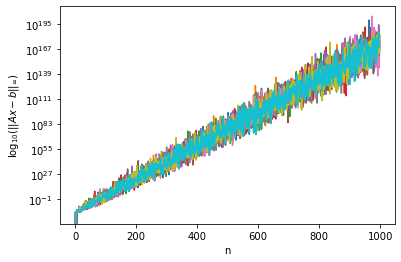

In [5]:
L=1000
for k in range(10):
    residu=np.zeros(L-1)
    for n in range(1,L):
        A=np.triu(np.random.rand(n,n))
        b=np.random.rand(n)
        x=Remontee(A,b)
        residu[n-1]=np.linalg.norm(A@x-b,np.inf)
    plt.plot(residu)
    plt.yscale('log')
    plt.xlabel("n");
    plt.ylabel("$\log_{10}(\|\|Ax-b\|\|_{\infty}$)");

## 2) Vérification de la complexité de l'algorithme de remontée.

In [602]:
import timeit

### Exercice 4

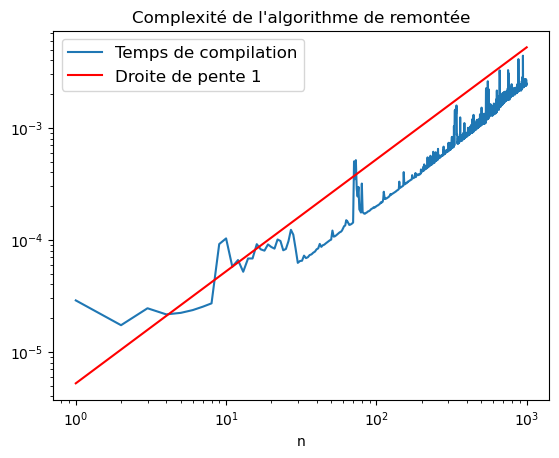

In [653]:
nbr_iteration=1000
temps=np.zeros(nbr_iteration)
for n in range(1,nbr_iteration+1):
    A=np.triu(np.random.rand(n,n))
    b=np.random.rand(n)
    temps_ini=timeit.default_timer()
    x=Remontee(A,b)
    temps[n-1]=timeit.default_timer()-temps_ini
inter=np.arange(1,nbr_iteration+1)
plt.plot(inter,temps,label='Temps de compilation')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("n");
plt.plot(inter,(temps[10]/inter[10])*inter,'r',label='Droite de pente 1')
plt.legend( prop={'size': 12})
plt.title("Complexité de l'algorithme de remontée");

In [654]:
def Remontee_Lent(A,b):
    dim=np.shape(b)[0]
    if dim!=np.shape(A)[0]:
        print("Problème de dimension entre A et b")
    x=np.zeros(dim)
    for i in range(n):
        if A[n-1-i,n-1-i]<10**(-12):
            print('Attention, la matrice est presque singulière pour le rang', i)
        s=0
        for j in range(i-1):
            s+=x[n-i+j]*A[n-i-1,n-i+j]
        x[n-1-i]=(1/A[n-1-i,n-1-i])*(b[n-1-i]-s)
    return x

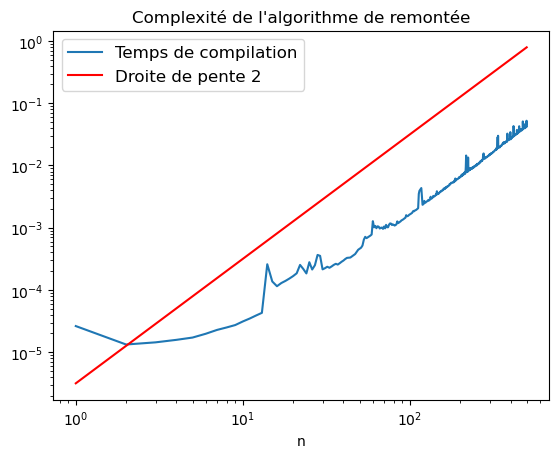

In [678]:
nbr_iteration=500
temps=np.zeros(nbr_iteration)
for n in range(1,nbr_iteration+1):
    A=np.triu(np.random.rand(n,n))
    b=np.random.rand(n)
    temps_ini=timeit.default_timer()
    x=Remontee_Lent(A,b)
    temps[n-1]=timeit.default_timer()-temps_ini
inter=np.arange(1,nbr_iteration+1)
plt.plot(inter,temps,label='Temps de compilation')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("n");
plt.plot(inter,(temps[10]/inter[10])*inter**2,'r',label='Droite de pente 2')
plt.legend( prop={'size': 12})
plt.title("Complexité de l'algorithme de remontée");

## 3) Algorithme de descente

In [687]:
def Descente(A,b):
    dim=np.shape(b)[0]
    if dim!=np.shape(A)[0]:
        print("Problème de dimension entre A et b")
    x=np.zeros(dim)
    for i in range(n):
        if A[i,i]<10**(-12):
            print('Attention, la matrice est presque singulière pour le rang', i)
        s=x[0:i:]@A[i,0:i]
        x[i]=(1/A[i,i])*(b[i]-s)
    return x

In [690]:
n=10
A=np.tril(np.random.rand(n,n))
b=np.random.rand(n)
deter=np.linalg.det(A)
if np.allclose(deter,0):
    print(f"Le déterminant est très petit car il est de {deter} donc la matrice n'est presque pas inversible.")
else:
    print(f"Le déterminant est {deter} donc la matrice est inversible.")
x=Descente(A,b)
print(f"La solution de Ax=b est x=\n {x}")
print(f"Est-ce que Ax=b ? {np.allclose(A@x-b,np.zeros(n))}.\nEn effet le résidu est de {np.linalg.norm(A@x-b,np.inf)}")

Le déterminant est 0.00010928759981234866 donc la matrice est inversible.
La solution de Ax=b est x=
 [ 0.126874    0.11438471  0.74732761  0.2626087  -1.03724469 -0.21209446
  1.07730871 -4.76364961  4.66282708 -1.59885454]
Est-ce que Ax=b ? True.
En effet le résidu est de 1.1102230246251565e-16


### Résidu en fonction de n

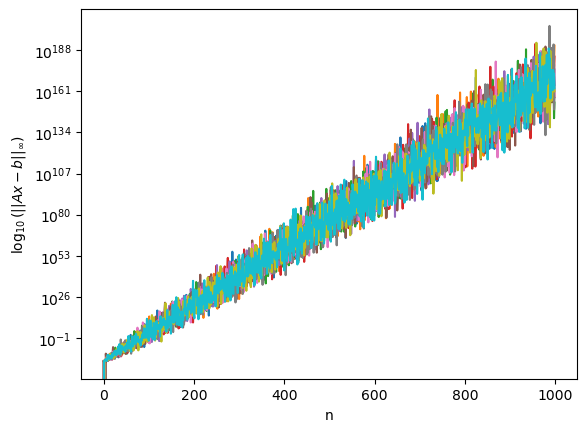

In [691]:
L=1000
for k in range(10):
    residu=np.zeros(L-1)
    for n in range(1,L):
        A=np.tril(np.random.rand(n,n))
        b=np.random.rand(n)
        x=Descente(A,b)
        residu[n-1]=np.linalg.norm(A@x-b,np.inf)
    plt.plot(residu)
    plt.yscale('log')
    plt.xlabel("n");
    plt.ylabel("$\log_{10}(\|\|Ax-b\|\|_{\infty}$)");


### Complexité de l'algorithme de descente

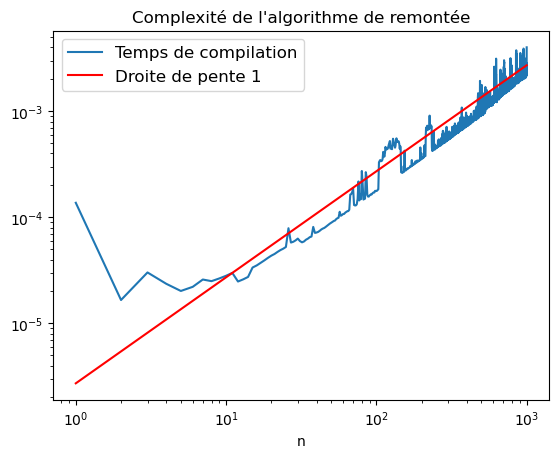

In [692]:
nbr_iteration=1000
temps=np.zeros(nbr_iteration)
for n in range(1,nbr_iteration+1):
    A=np.tril(np.random.rand(n,n))
    b=np.random.rand(n)
    temps_ini=timeit.default_timer()
    x=Descente(A,b)
    temps[n-1]=timeit.default_timer()-temps_ini
inter=np.arange(1,nbr_iteration+1)
plt.plot(inter,temps,label='Temps de compilation')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("n");
plt.plot(inter,(temps[10]/inter[10])*inter,'r',label='Droite de pente 1')
plt.legend( prop={'size': 12})
plt.title("Complexité de l'algorithme de remontée");